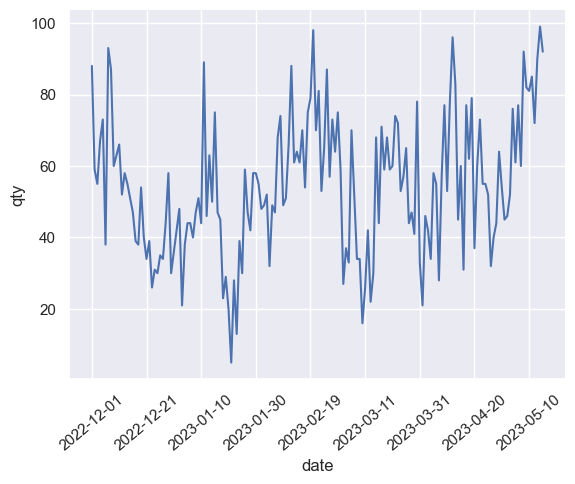

In [2]:
import pandas as pd
import seaborn as sns
import pylab as plt
from matplotlib.ticker import MaxNLocator
data = pd.read_csv('No_abnormality_time/time2.csv', index_col=3)
sns.set(style="darkgrid")
g = sns.lineplot(data=data, x='date', y='qty')
plt.xticks(rotation=40)
ax = plt.gca()
sns.despine()
ax.xaxis.set_major_locator(MaxNLocator(steps=[2]))
#plt.savefig(fname = '时间序列1.png', dpi = 500, bbox_inches = 'tight', pad_inches = 0.0)


In [4]:
import lightgbm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import catboost
import xgboost
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
import pickle
import numpy as np
def wmapes(y_true, y_pred):
    return 1 - np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)
ret = []
for i in range(0, 7):
    data = pickle.load(open(f'timeseries10/timeseries{i}.pkl', 'rb'))
    y = data.iloc[:, -1].values
    x = data.iloc[:, :-1].values
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
    model = Pipeline([
        ('scaler', MinMaxScaler()),
        # ('stacking', StackingRegressor(
        #     regressors = [
        #         lightgbm.LGBMRegressor(), 
        #         catboost.CatBoostRegressor(verbose=False), 
        #         #xgboost.XGBRegressor()
        #     ], 
        #     meta_regressor=LinearRegression()
        # ))
        # ('voting', VotingRegressor(
        #     estimators = [
        #         ('lgb', lightgbm.LGBMRegressor()), 
        #         ('cat', catboost.CatBoostRegressor(verbose=False)),
        #         #('xgb', xgboost.XGBRegressor())
        #     ]
        # ))

         ('lightgbm', lightgbm.LGBMRegressor())
    ])
    model.fit(train_x, train_y)
    ret.append(wmapes(test_y, model.predict(test_x)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4946
[LightGBM] [Info] Number of data points in the train set: 26163, number of used features: 20
[LightGBM] [Info] Start training from score 9.752394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 73116, number of used features: 20
[LightGBM] [Info] Start training from score 19.262502
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5038
[LightGBM] [Info] Number of data points in the train set: 33988, number of used features: 20
[LightGBM] [Info] Start tr

In [6]:
sum(ret) / len(ret)

0.5581184426485535

In [65]:
import lightgbm
import warnings
from bayes_opt import BayesianOptimization
warnings.filterwarnings('ignore')
import pickle
data = pickle.load(open('timeseries.pkl', 'rb'))

In [175]:

#pickle.dump(data.iloc[:, :-7], open('timeseries_1.pkl', 'wb'))

In [66]:
from sklearn.model_selection import train_test_split
y = data.iloc[:, 30:-7].values
x = data.drop(columns=data.iloc[:, 30:-7].columns)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [67]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from mlxtend.regressor import StackingRegressor
import catboost
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.multioutput import MultiOutputRegressor
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
model = Pipeline([
    ('scaler', MinMaxScaler()),
    # ('stacking', MultiOutputRegressor(StackingRegressor(
    #     regressors = [
    #         lightgbm.LGBMRegressor(), 
    #         catboost.CatBoostRegressor(), 
    #         #xgboost.XGBRegressor()
            
    #     ], 
    #     meta_regressor=LinearRegression()
    # )))
    #('lightgbm', lightgbm.LGBMRegressor())

    ('lightgbm', MultiOutputRegressor(lightgbm.LGBMRegressor()))
])

In [68]:
model.fit(train_x, train_y)
import numpy as np
def wmapes(y_true, y_pred):
    return 1 - np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7664
[LightGBM] [Info] Number of data points in the train set: 194809, number of used features: 37
[LightGBM] [Info] Start training from score 13.488779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7664
[LightGBM] [Info] Number of data points in the train set: 194809, number of used features: 37
[LightGBM] [Info] Start training from score 13.505101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7664
[LightGBM] [Info] Number of data points in the train set: 194809, number of used features: 37
[LightGBM] [Info] Star

In [ ]:
import pickle 
pickle.dump(model, open('lightgbm.pkl', 'wb'))

d:\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


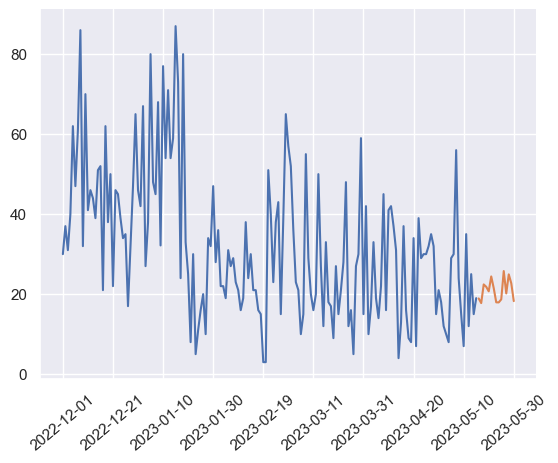

In [5]:
import pandas as pd
import seaborn as sns
import pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
model = pickle.load(open('lightgbm.pkl', 'rb'))
data = pd.read_csv('No_abnormality_time/time0.csv', index_col=3)
sns.set(style="darkgrid")
plt.plot(data.index, data.qty)
plt.plot([f'2023-05-{i}' for i in range(16, 31)], 
         model.predict(np.concatenate([data.qty[-30:].values, np.array([1, 0, 0, 0, 0, 0, 0])]).reshape(1, -1))[0])
plt.xticks(rotation=40)
ax = plt.gca()
sns.despine()
ax.xaxis.set_major_locator(MaxNLocator(steps=[2]))
plt.savefig(fname = '第一条时间序列结果.png', dpi = 500, bbox_inches = 'tight', pad_inches = 0.0)

In [64]:
wmapes(test_y, model.predict(test_x))

0.5339130237851063

In [ ]:
import pandas as pd


In [74]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

# 自己处理好train_x, train_y

ret = []
# lgb_cv 函数定义了要去调哪些参数，并且使用交叉验证去计算特定指标的值（例子中用的是roc_auc)。
# 实际调参的时候也不可能所有参数一起调整，最好是分批次调参。
# 而且调参的时候可以观察本轮最优参数是否逼近了设定的搜索阈值，下一次调参的时候可以把搜索的范围扩大。
def lgb_cv(n_estimators,min_gain_to_split,subsample, max_depth,colsample_bytree, min_child_samples,reg_alpha,reg_lambda,num_leaves,learning_rate):
 
        model = Pipeline([
                ('scaler', MinMaxScaler()),
                # ('stacking', MultiOutputRegressor(StackingRegressor(
                #     regressors = [
                #         lightgbm.LGBMRegressor(), 
                #         catboost.CatBoostRegressor(), 
                #         #xgboost.XGBRegressor()
                        
                #     ], 
                #     meta_regressor=LinearRegression()
                # )))
                #('lightgbm', lightgbm.LGBMRegressor())

                ('lightgbm', MultiOutputRegressor(lightgbm.LGBMRegressor(
                        boosting_type='gbdt', objective='binary',n_jobs=-1,
                                   colsample_bytree=float(colsample_bytree),
                                   min_child_samples=int(min_child_samples),
                                   n_estimators=int(n_estimators),
                                   num_leaves=int(num_leaves),
                                   reg_alpha=float(reg_alpha),
                                   reg_lambda=float(reg_lambda),
                                   max_depth=int(max_depth),
                                   subsample=float(subsample),
                                   min_gain_to_split = float(min_gain_to_split),
                                   learning_rate=float(learning_rate),)))
        ])
        model.fit(train_x, train_y)
        ret.append(wmapes(test_y, model.predict(test_x)))
        return -ret[-1]

# 实例化BayesianOptimization类，参数靠自己去定义取值范围
lgb_bo = BayesianOptimization(
        lgb_cv,
        {
        'colsample_bytree': (0.5,1),
        'min_child_samples': (2, 200),
        'num_leaves': (5, 1000),
        'subsample': (0.6, 1),
        'max_depth':(2,10),
        'n_estimators': (10, 1000),
        'reg_alpha':(0,10),
        'reg_lambda':(0,10),
        'min_gain_to_split':(0,1),
        'learning_rate':(0,1)
         },
    )

# 训练
lgb_bo.maximize()

# 可以输出最优的值以及最优参数等等
print(lgb_bo.max)

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | min_ga... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_gain_to_split is set=0.7892172659455228, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7892172659455228
[LightGBM] [Warning] min_gain_to_split is set=0.7892172659455228, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7892172659455228
[LightGBM] [Info] Number of positive: 158166, number of negative: 36643
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7664
[LightGBM] [Info] Number of data points in the train set: 194809, number of used features: 37
[LightGBM] [Info] [binary:BoostFromSco

Exception ignored on calling ctypes callback function: <function _log_callback at 0x0000023622BA3B00>
Traceback (most recent call last):
  File "d:\Python\Python311\Lib\site-packages\lightgbm\basic.py", line 203, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f